# Predicting House price using OLS method 

# Multiple regression using sklearn 

### Using correlation method for feature selection and using OLS method.

In [1]:
#Importing Libraries...

import pandas
import seaborn
import matplotlib
import sklearn
import numpy

In [2]:
# importing dataset
data_df = pandas.read_csv("CSV HERE")

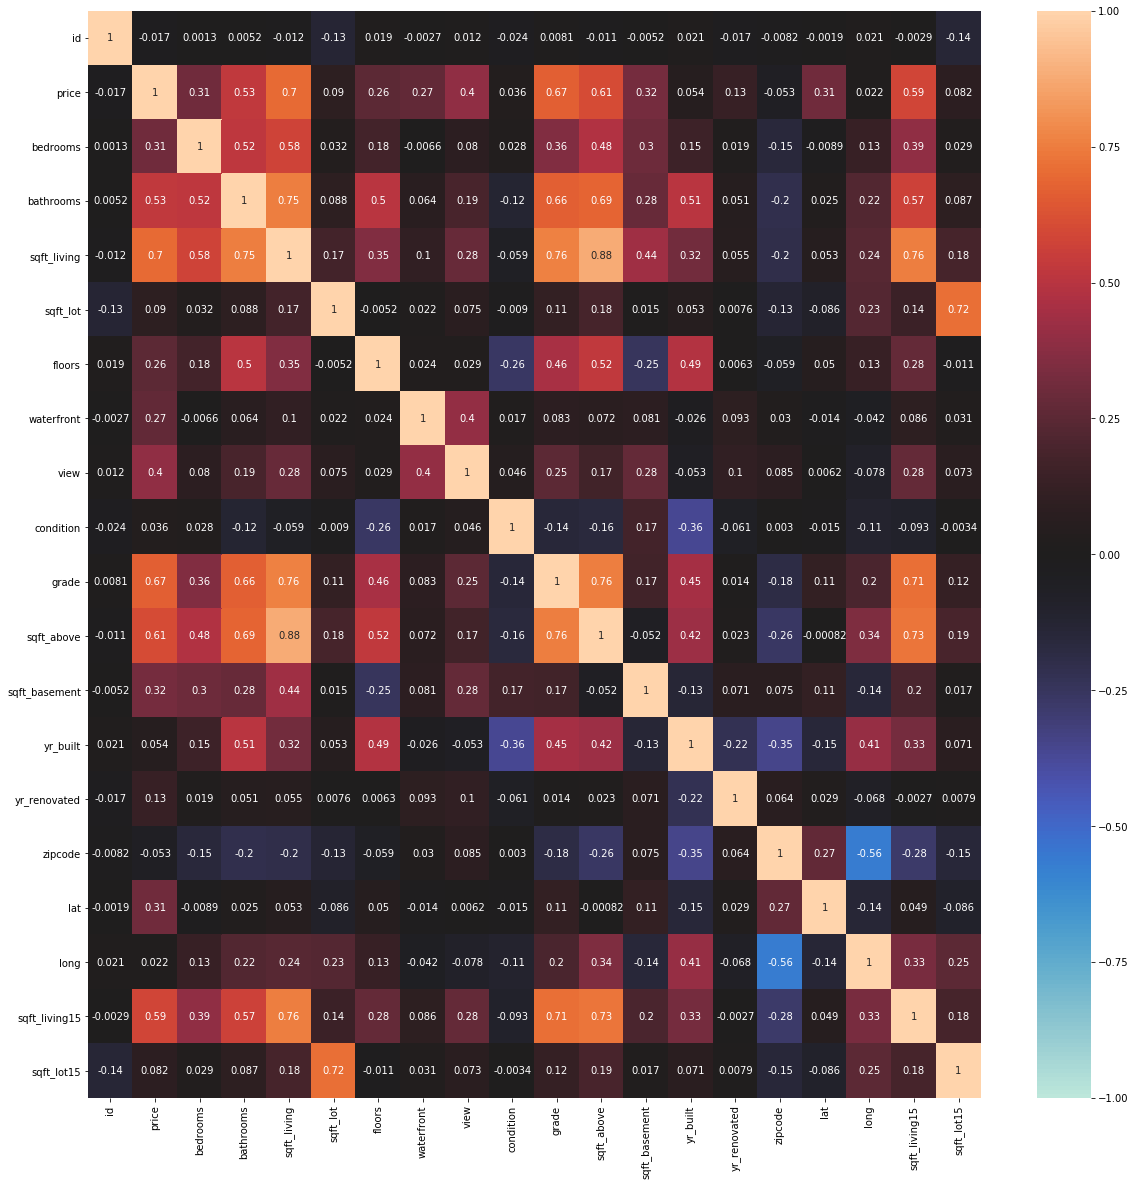

In [7]:
#using correlation heatmap for visualizing feature selection
matplotlib.pyplot.subplots(figsize = (20,20))
seaborn.heatmap(data_df.corr(), annot = True, vmin = -1, vmax = 1, center = 0)

In [9]:
data_corr = data_df.corr()    #data correlation

In [10]:
data_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [3]:
# selected features after searching for feature that is positively correlated with dependent variable.

data_xfeatures = data_df[["bathrooms", "sqft_living", "grade", "sqft_above", "sqft_living15"]]
data_yfeatures = data_df[['price']]

In [44]:
data_xfeatures

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800
...,...,...,...,...,...
21608,2.50,1530,8,1530,1530
21609,2.50,2310,8,2310,1830
21610,0.75,1020,7,1020,1020
21611,2.50,1600,8,1600,1410


In [46]:
data_yfeatures

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


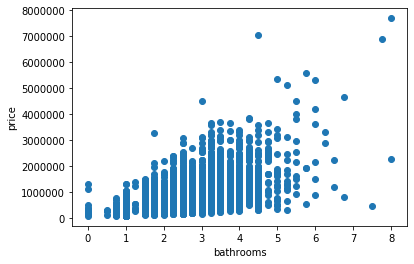

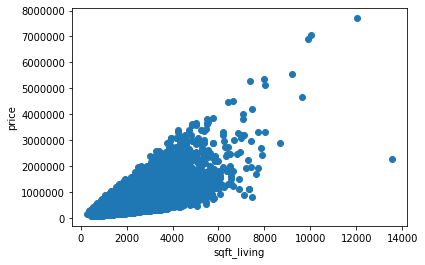

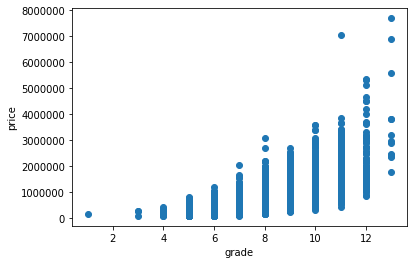

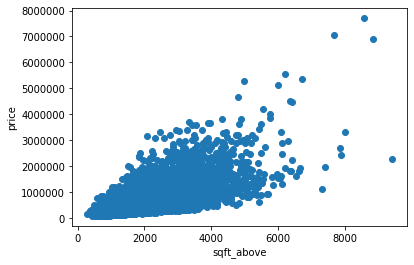

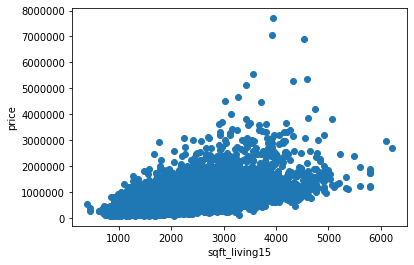

<Figure size 432x288 with 0 Axes>

In [64]:
# visualizing the selected features wrt. dependent feature
for k in (list(data_xfeatures.columns)):
    matplotlib.pyplot.scatter(x = data_xfeatures[k], y = data_yfeatures)
    matplotlib.pyplot.xlabel(k)
    matplotlib.pyplot.ylabel("price")
    matplotlib.pyplot.figure()

In [4]:
# manually selecting the train and test features because the feature are based on time serires and hence change in house price is dependent on time
x_train = data_xfeatures.iloc[:16210, :]
y_train = data_yfeatures.iloc[:16210, :]

x_test = data_xfeatures.iloc[16210:, :]
y_test = data_yfeatures.iloc[16210:, :]

In [181]:
x_test


,bathrooms,sqft_living,grade,sqft_above,sqft_living15
16210,2.25,1700,7,850,2180
16211,3.00,1530,7,1530,1930
16212,1.00,1260,6,1260,1090
16213,2.00,2760,7,1380,1400
16214,2.50,1830,7,1830,1820
...,...,...,...,...,...
21608,2.50,1530,8,1530,1530
21609,2.50,2310,8,2310,1830
21610,0.75,1020,7,1020,1020
21611,2.50,1600,8,1600,1410


In [157]:
# fitting regression using sklearn library...

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)  #uses OLS to find optimum parameter by minimizing the sum of residual error
y_pred = pandas.DataFrame(model.predict(x_test))
coef = model.coef_

In [162]:
#evaluation metrics..

from sklearn import metrics
numpy.sqrt(metrics.mean_squared_error(y_test, y_pred))

NameError: name 'y_pred' is not defined

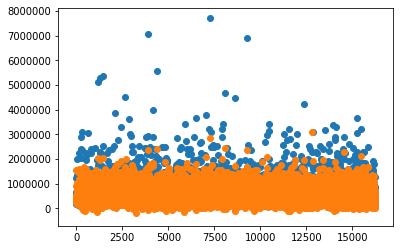

In [154]:
matplotlib.pyplot.scatter(y_train.index.values, y_train)
matplotlib.pyplot.scatter(ypred.sort_values(by = 'price').index.values, ypred.sort_values(by = 'price'))

# using whole data as x features expect for price and checking result

In [181]:
xall_features= data_df.iloc[:, 3: ]
yall_features = data_df.iloc[:, 2:3]

In [186]:
xall_features = xall_features[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]

In [188]:
yall_features

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [5]:
x_train_new = xall_features.iloc[:16210, :]
y_train_new = yall_features.iloc[:16210, :]

x_test_new = xall_features.iloc[16210:, :] 
y_test_new = yall_features.iloc[16210:, :]

NameError: name 'xall_features' is not defined

In [196]:
y_test_new

,price
16210,565000
16211,260000
16212,190000
16213,399950
16214,275000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [197]:
model_new = LinearRegression().fit(x_train_new, y_train_new)  
y_pred_new = pandas.DataFrame(model_new.predict(x_test_new))
coef_new = model_new.coef_

In [198]:
coef_new

array([[-3.19975103e+04, -2.01225074e+04,  1.33513471e+02,
         3.72089865e-02, -4.21788711e+03,  6.27535706e+05,
         5.70626010e+04,  5.29455807e+04,  9.19564859e+04,
         5.59455883e+01,  7.75678828e+01,  2.69458557e+01,
        -8.35388614e-01]])

In [199]:
numpy.sqrt(metrics.mean_squared_error(y_test_new, y_pred_new))

230111.38556795122

## using polynomial features for the first method of using feature selection with correlation.


In [226]:
from sklearn.preprocessing import PolynomialFeatures
x_poly = pandas.DataFrame(PolynomialFeatures(degree = 2,include_bias = False).fit_transform(x_train)) 

In [227]:
model_poly = LinearRegression().fit(x_poly, y_train)
model_pred = model_poly.predict(PolynomialFeatures(degree = 2,include_bias = False).fit_transform(x_test))

In [228]:
numpy.sqrt(metrics.mean_squared_error(y_test, model_pred))

228414.09965789077

In [211]:
len(model_pred)


5403

# using gradient desecnt algorithm for optimizing the parameters for minimizing squarred error.

### univarite regression with gradient descent optimization

In [179]:
one = numpy.ones((len(x_train),1))
one_test = numpy.ones((len(x_test), 1))

In [131]:
def predict(w0, w1):
    y_prediction = w0*(st_x0) +w1*(st_x)
    return y_prediction

In [132]:
def cost_fn(sum_squarred, n):
    cost = (1/(2*n))*sum_squarred
    return cost

In [185]:
## STANDARD SCALAR FOR TRAINING
from sklearn.preprocessing import StandardScaler 
scalar_x = StandardScaler()
scalar_x.fit(x_train.iloc[:, 1:2])
st_x = scalar_x.transform(x_train.iloc[:, 1:2])

scalar_x0 = StandardScaler()
scalar_x0.fit(one)
st_x0 = scalar_x0.transform(one)

scalar_y  = StandardScaler()
scalar_y.fit(y_train)
st_y  = scalar_y.transform(y_train)

## STANDARD SCALAR FOR TESTING

scalar_test_x0 = StandardScaler()
scalar_test_x0.fit(one_test)
st_x0_test = scalar_test_x0.transform(one_test)

scalar_test_x1 = StandardScaler()
scalar_test_x1.fit(x_test.iloc[:,1:2])
st_x1_test = scalar_test_x1.transform(x_test.iloc[:, 1:2])

scalar_test_y = StandardScaler()
scalar_test_y.fit(y_test)
st_y_test = scalar_test_y.transform(y_test)



In [215]:
cost_list = []
old_w0 = []
old_w1 = []
n = len(x_train)
def gradient_univariate_function(w0, w1, alpha, simulation):
    for simult in range(simulation):
        pred_val = predict(w0,w1)
        y_error = pred_val - st_y
        y_error_sum = numpy.sum((y_error))
        y_error_square = numpy.sum((y_error.T)*(y_error))
        cost_val = cost_fn(y_error_square, n)
        cost_list.append(cost_val)
        old_w0.append(w0)
        old_w1.append(w1)
        w0 = w0 - (alpha/n)*y_error_sum
        w1 = w1 - (alpha/n)*numpy.dot((y_error.T),(st_x))
            

In [216]:
gradient_univariate_function(0,0,0.01,1000)

In [195]:
min_cost_position = cost_list.index(min(cost_list))
w0p = old_w0[min_cost_position]
w1p = old_w1[min_cost_position]

y_predict_test = w0p*st_x0_test + w1p*st_x1_test
y_pred_inv = scalar_test_y.inverse_transform(y_predict_test)


In [198]:
from sklearn import metrics
numpy.sqrt(metrics.mean_squared_error(y_test,y_pred_inv ))

261562.0485683558